### 1. Min Max Normalization

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("wine_data.csv", header=None,usecols=[0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']

In [4]:
df

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Alcohol', ylabel='Density'>

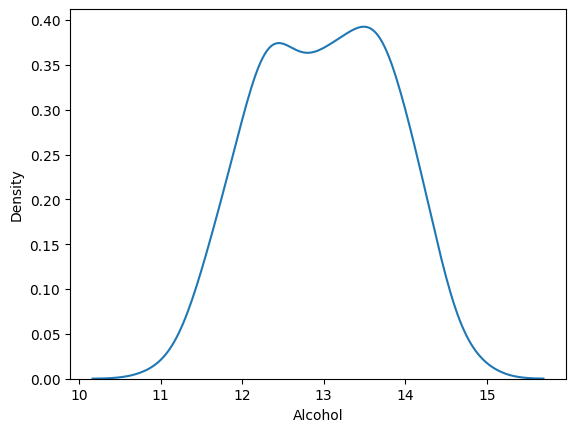

In [5]:
sns.kdeplot(df['Alcohol'])

c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Malic acid', ylabel='Density'>

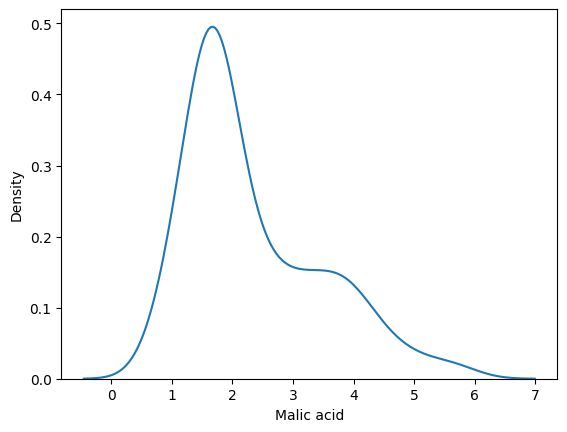

In [6]:
sns.kdeplot(df['Malic acid'])

<Axes: xlabel='Alcohol', ylabel='Malic acid'>

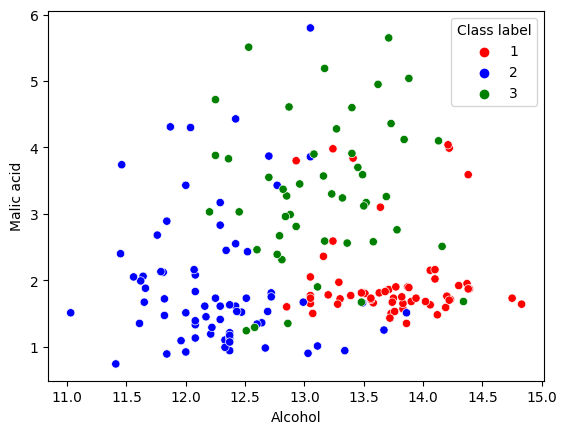

In [7]:
color_dict = {1:'red', 3:'green', 2:'blue'}
sns.scatterplot(x=df['Alcohol'],y=df['Malic acid'], hue=df['Class label'], palette=color_dict)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis=1),
                                                    df['Class label'],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape,X_test.shape

((124, 2), (54, 2))

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

#fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# trnasform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [11]:
np.round(X_train.describe(),1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [12]:
np.round(X_test_scaled.describe(),1)

,Alcohol,Malic acid
count,54.0,54.0
mean,0.5,0.3
std,0.2,0.2
min,0.1,-0.0
25%,0.4,0.1
50%,0.5,0.2
75%,0.7,0.4
max,1.0,1.0


 So for min max the minimum value become zero while the maximum value becomes 1 and that's precisedly what we are observing

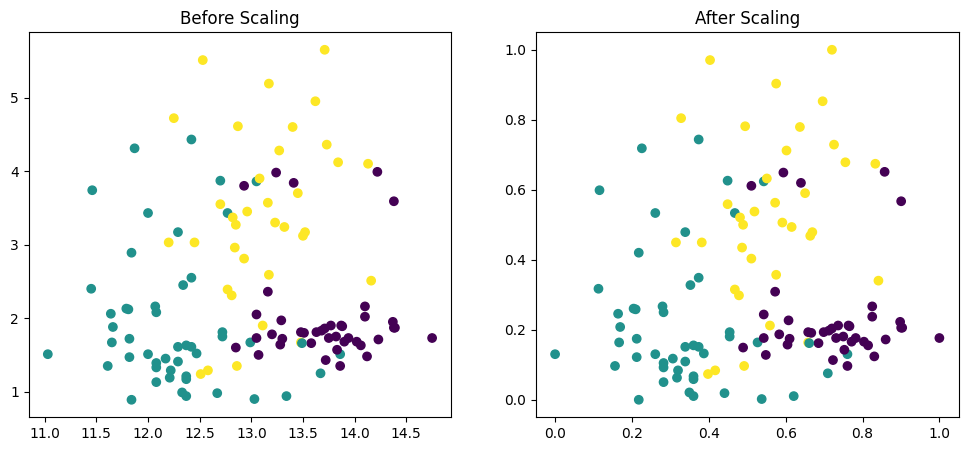

In [13]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.scatter(X_train['Alcohol'], X_train['Malic acid'],c=y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Malic acid'],c=y_train)
ax2.set_title("After Scaling")
plt.show()

**Basically we are squishing the representation of data within a unit rectangle**
as we can see in the above figure

c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated

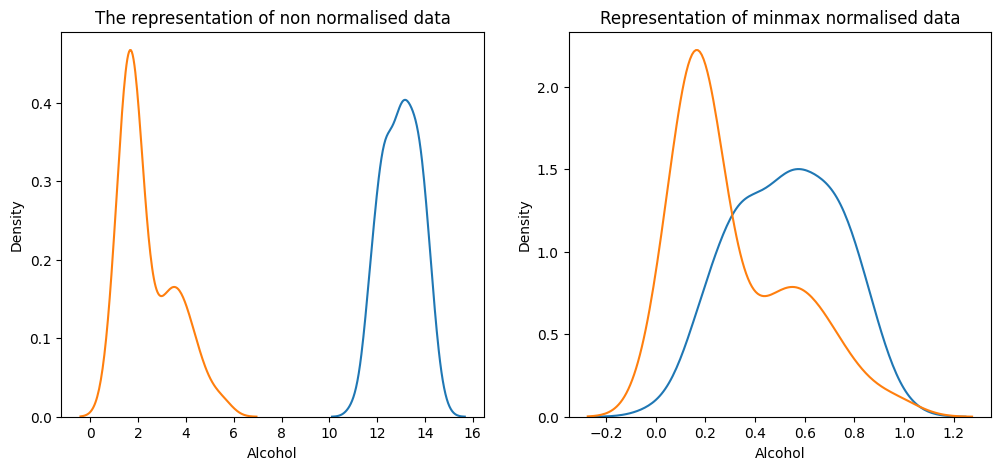

In [14]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("The representation of non normalised data")
sns.kdeplot(X_train['Alcohol'], ax=ax1)
sns.kdeplot(X_train['Malic acid'],ax=ax1)

ax2.set_title("Representation of minmax normalised data")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)
sns.kdeplot(X_train_scaled['Malic acid'],ax=ax2)

plt.show()

After min max scaling both Alcohol as well as Malic acid are with [0,1] which initially was distributed across the range

c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Normalised visualisation for Alcohol'}, xlabel='Alcohol', ylabel='Density'>

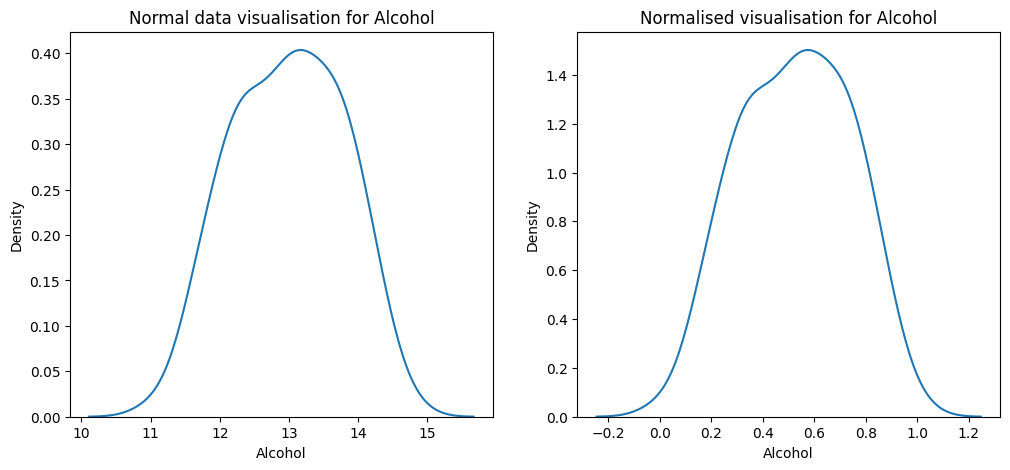

In [18]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Normal data visualisation for Alcohol")
sns.kdeplot(X_train['Alcohol'],ax=ax1)

ax2.set_title("Normalised visualisation for Alcohol")
sns.kdeplot(X_train_scaled['Alcohol'],ax=ax2)

c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\My Files\100 Days of Machine Learning\venv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


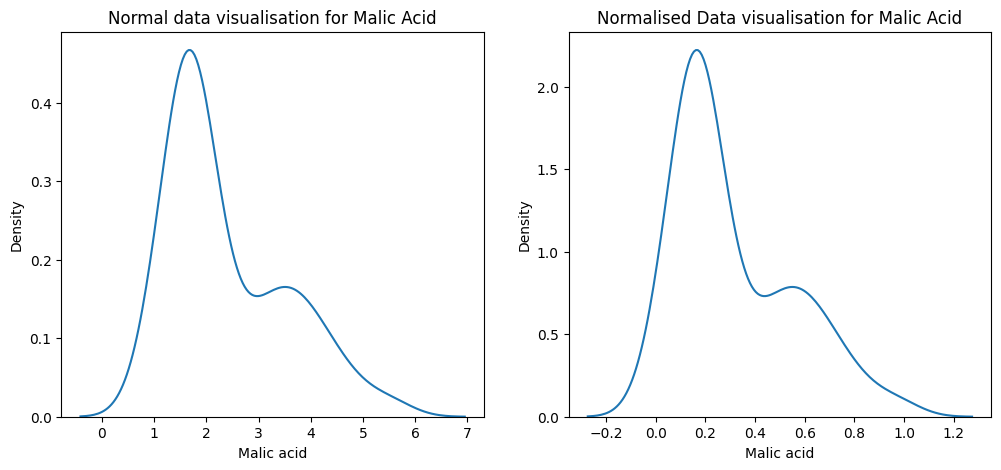

In [19]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title("Normal data visualisation for Malic Acid")
sns.kdeplot(X_train["Malic acid"], ax=ax1)

ax2.set_title("Normalised Data visualisation for Malic Acid")
sns.kdeplot(X_train_scaled["Malic acid"], ax=ax2)
plt.show()

**Outlier does create some problem in this because since it squishes the entire data in [0,1] it also squishes the outlier within those range and that causes some issues here because it reduces the impact of outlier in some cases**

### 2. Mean Normalisation